In [52]:
import pandas as pd

In [61]:
'''
opens a schedule file and appends all the expected utilities to the dataframe

params: df = dataframe, is_num = initial state num
'''
def append_eu_to_df(df, is_num, experiment_num):
    f = open('../' + str(is_num) + '/schedules__' + str(experiment_num) + '.txt')
    lines = f.readlines()
    lines = [x.strip() for x in lines]
    f.close()

    # keep track of the schedule number
    schedule = 0
    schedules = []
    eu = []
    for line in lines:
        elements = line.split()

        # increment the schedule variable if we reach a line with a new schedule
        if 'Schedule' in elements:
            schedule += 1

        # if line contains "EU", append that EU to the eu list
        elif 'EU:' in elements:
            schedules.append(schedule)
            eu.append(float(elements[-1]))
    
    # create a new dataframe to hold the new data and then append to df
    new_df = pd.DataFrame()
    new_df['Schedule'] = schedules
    new_df['Expected Utility'] = eu
    df = df.append(new_df)
    return df

In [62]:
df = pd.DataFrame()

# iterate through all 9 initial state output folders
for i in range (1,10):

    # iterate through all 5 schedule files 
    for j in range(1,6):
        df = append_eu_to_df(df, i, j)

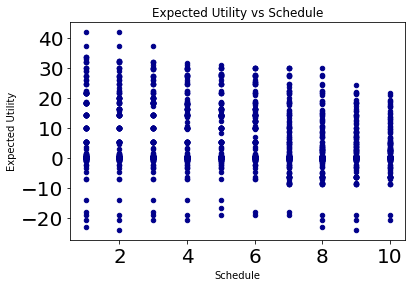

In [63]:
ax1 = df.plot.scatter(x='Schedule',
                      y='Expected Utility',
                      c='DarkBlue',
                     title = 'Expected Utility vs Schedule',
                     fontsize = 20)
ax1

In [76]:
'''
opens a runtime file and appends all runtimes to a dataframe
'''
def append_runtime_to_df(df, is_num):
    f = open('../' + str(is_num) + '/runtimes.txt')
    lines = f.readlines()
    lines = [x.strip() for x in lines]
    f.close()
    
    experiments = [1,2,3,4,5]
    runtimes = []
    for line in lines:
        elements = line.split()
        runtimes.append(float(elements[-2]))
    new_df = pd.DataFrame()
    new_df['Experiment'] = experiments
    new_df['Runtime'] = runtimes
    df = df.append(new_df)
    return df

In [77]:
df2 = pd.DataFrame()
for i in range (1,10):
    df2 = append_runtime_to_df(df2, i)

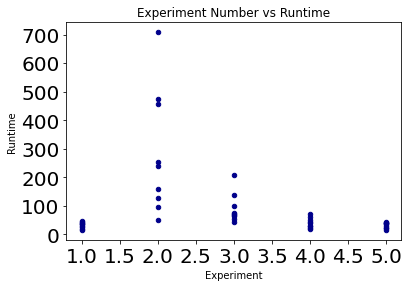

In [78]:
ax2 = df2.plot.scatter(x='Experiment',
                      y='Runtime (s)',
                      c='DarkBlue',
                     title = 'Experiment Number vs Runtime',
                     fontsize = 20)
ax2